# Clustering our music database

First, let's normalize both of our dataframes to be able to cluster our database 

In [1]:
# Importing all needeed libraries

import pandas as pd
import numpy as np

from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing datasets 

top_100 = pd.read_csv('top_100_audio_feat.csv')
top_100.head()

,Unnamed: 0,Unnamed: 0.1,title,artist,id,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,0.520,0.731,6,-5.338,0,...,0.3110,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4
1,1,1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,0.905,0.563,8,-6.135,1,...,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4
2,2,2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,0.463,0.642,1,-4.474,1,...,0.0686,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893,4
3,3,3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,0.714,0.728,10,-4.595,1,...,0.1060,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955,4
4,4,4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,0.836,0.743,10,-6.305,0,...,0.3350,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4


In [3]:
top_100.shape

(95, 23)

In [4]:
top_100.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
title               0
artist              0
id                  0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [5]:
not_hot = pd.read_csv('not_hot_songs_alb.csv')
not_hot.shape

(5000, 23)

In [6]:
not_hot.head()

,Unnamed: 0,Unnamed: 0.1,singer,song,id,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,Su ta gar,Abere izate ukatua,4tMbI2qkOIfc1kzsbw7X64,0.393,0.967,10.0,-5.775,0.0,...,0.147,0.469,98.016,audio_features,4tMbI2qkOIfc1kzsbw7X64,spotify:track:4tMbI2qkOIfc1kzsbw7X64,https://api.spotify.com/v1/tracks/4tMbI2qkOIfc...,https://api.spotify.com/v1/audio-analysis/4tMb...,243973.0,4.0
1,1,1,Spice Girls,Viva Forever (Tony Rich Remix Instrumental),1dehm5fgmBVxxur0YnZLMq,0.809,0.478,10.0,-7.371,0.0,...,0.125,0.594,168.897,audio_features,1dehm5fgmBVxxur0YnZLMq,spotify:track:1dehm5fgmBVxxur0YnZLMq,https://api.spotify.com/v1/tracks/1dehm5fgmBVx...,https://api.spotify.com/v1/audio-analysis/1deh...,342733.0,4.0
2,2,2,Dandy Livingstone,Think About That,5vWscUwJJSsIvKR0YJa8cV,0.759,0.654,0.0,-8.462,1.0,...,0.113,0.664,95.544,audio_features,5vWscUwJJSsIvKR0YJa8cV,spotify:track:5vWscUwJJSsIvKR0YJa8cV,https://api.spotify.com/v1/tracks/5vWscUwJJSsI...,https://api.spotify.com/v1/audio-analysis/5vWs...,172947.0,4.0
3,3,3,Orquesta Harlow,That Groovy Shingaling,2kTZKa7J0ykBpmzs5TMjWT,0.454,0.481,10.0,-10.895,1.0,...,0.158,0.757,122.281,audio_features,2kTZKa7J0ykBpmzs5TMjWT,spotify:track:2kTZKa7J0ykBpmzs5TMjWT,https://api.spotify.com/v1/tracks/2kTZKa7J0ykB...,https://api.spotify.com/v1/audio-analysis/2kTZ...,135187.0,4.0
4,4,4,King B.A.V.,Take It Off,77ihANWN9MuLGim3ZtYIti,0.706,0.580,7.0,-3.692,0.0,...,0.256,0.115,75.102,audio_features,77ihANWN9MuLGim3ZtYIti,spotify:track:77ihANWN9MuLGim3ZtYIti,https://api.spotify.com/v1/tracks/77ihANWN9MuL...,https://api.spotify.com/v1/audio-analysis/77ih...,244827.0,4.0


In [7]:
not_hot.isna().sum()

Unnamed: 0             0
Unnamed: 0.1           0
singer                 0
song                   0
id                  1417
danceability        1419
energy              1419
key                 1419
loudness            1419
mode                1419
speechiness         1419
acousticness        1419
instrumentalness    1419
liveness            1419
valence             1419
tempo               1419
type                1419
id.1                1419
uri                 1419
track_href          1419
analysis_url        1419
duration_ms         1419
time_signature      1419
dtype: int64

In [8]:
# let's drop NA's rows : 
not_hot.dropna(inplace=True)

In [9]:
not_hot.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
singer              0
song                0
id                  0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id.1                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [10]:
not_hot.shape

(3581, 23)

In [11]:
# Now let's normalize both dataframes to be able to concat them together :
not_hot.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'singer', 'song', 'id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id.1',
       'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [12]:
top_100.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'title', 'artist', 'id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id.1',
       'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [13]:
not_hot.rename(columns = {'singer' : 'artist', 'song' : 'title'}, inplace = True)
not_hot.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'artist', 'title', 'id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id.1',
       'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [14]:
not_hot = not_hot[['title', 'artist', 'id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id.1',
       'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']]

In [15]:
top_100 = top_100[['title', 'artist', 'id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id.1',
       'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']]

In [16]:
# Let's add a new column to point from which dataframe the rows belong
not_hot['original_df'] = "not_hot"
top_100['original_df'] = "hot"

In [17]:
display(not_hot.head())
display(top_100.head())

,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,original_df
0,Abere izate ukatua,Su ta gar,4tMbI2qkOIfc1kzsbw7X64,0.393,0.967,10.0,-5.775,0.0,0.0511,0.000010,...,0.469,98.016,audio_features,4tMbI2qkOIfc1kzsbw7X64,spotify:track:4tMbI2qkOIfc1kzsbw7X64,https://api.spotify.com/v1/tracks/4tMbI2qkOIfc...,https://api.spotify.com/v1/audio-analysis/4tMb...,243973.0,4.0,not_hot
1,Viva Forever (Tony Rich Remix Instrumental),Spice Girls,1dehm5fgmBVxxur0YnZLMq,0.809,0.478,10.0,-7.371,0.0,0.1870,0.010600,...,0.594,168.897,audio_features,1dehm5fgmBVxxur0YnZLMq,spotify:track:1dehm5fgmBVxxur0YnZLMq,https://api.spotify.com/v1/tracks/1dehm5fgmBVx...,https://api.spotify.com/v1/audio-analysis/1deh...,342733.0,4.0,not_hot
2,Think About That,Dandy Livingstone,5vWscUwJJSsIvKR0YJa8cV,0.759,0.654,0.0,-8.462,1.0,0.0523,0.134000,...,0.664,95.544,audio_features,5vWscUwJJSsIvKR0YJa8cV,spotify:track:5vWscUwJJSsIvKR0YJa8cV,https://api.spotify.com/v1/tracks/5vWscUwJJSsI...,https://api.spotify.com/v1/audio-analysis/5vWs...,172947.0,4.0,not_hot
3,That Groovy Shingaling,Orquesta Harlow,2kTZKa7J0ykBpmzs5TMjWT,0.454,0.481,10.0,-10.895,1.0,0.0318,0.708000,...,0.757,122.281,audio_features,2kTZKa7J0ykBpmzs5TMjWT,spotify:track:2kTZKa7J0ykBpmzs5TMjWT,https://api.spotify.com/v1/tracks/2kTZKa7J0ykB...,https://api.spotify.com/v1/audio-analysis/2kTZ...,135187.0,4.0,not_hot
4,Take It Off,King B.A.V.,77ihANWN9MuLGim3ZtYIti,0.706,0.580,7.0,-3.692,0.0,0.0423,0.000473,...,0.115,75.102,audio_features,77ihANWN9MuLGim3ZtYIti,spotify:track:77ihANWN9MuLGim3ZtYIti,https://api.spotify.com/v1/tracks/77ihANWN9MuL...,https://api.spotify.com/v1/audio-analysis/77ih...,244827.0,4.0,not_hot


,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,original_df
0,As It Was,Harry Styles,4LRPiXqCikLlN15c3yImP7,0.520,0.731,6,-5.338,0,0.0557,0.3420,...,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,hot
1,First Class,Jack Harlow,1rDQ4oMwGJI7B4tovsBOxc,0.905,0.563,8,-6.135,1,0.1020,0.0254,...,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4,hot
2,Wait For U,Future Featuring Drake & Tems,59nOXPmaKlBfGMDeOVGrIK,0.463,0.642,1,-4.474,1,0.3400,0.3140,...,0.339,83.389,audio_features,59nOXPmaKlBfGMDeOVGrIK,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893,4,hot
3,Late Night Talking,Harry Styles,1qEmFfgcLObUfQm0j1W2CK,0.714,0.728,10,-4.595,1,0.0468,0.2980,...,0.901,114.996,audio_features,1qEmFfgcLObUfQm0j1W2CK,spotify:track:1qEmFfgcLObUfQm0j1W2CK,https://api.spotify.com/v1/tracks/1qEmFfgcLObU...,https://api.spotify.com/v1/audio-analysis/1qEm...,177955,4,hot
4,About Damn Time,Lizzo,1PckUlxKqWQs3RlWXVBLw3,0.836,0.743,10,-6.305,0,0.0656,0.0995,...,0.722,108.966,audio_features,1PckUlxKqWQs3RlWXVBLw3,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,hot


In [18]:
# Now we can concatenate them together, vertically :-) 
df_songs = pd.concat([not_hot, top_100], axis = 0)
df_songs.head()

,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,original_df
0,Abere izate ukatua,Su ta gar,4tMbI2qkOIfc1kzsbw7X64,0.393,0.967,10.0,-5.775,0.0,0.0511,0.000010,...,0.469,98.016,audio_features,4tMbI2qkOIfc1kzsbw7X64,spotify:track:4tMbI2qkOIfc1kzsbw7X64,https://api.spotify.com/v1/tracks/4tMbI2qkOIfc...,https://api.spotify.com/v1/audio-analysis/4tMb...,243973.0,4.0,not_hot
1,Viva Forever (Tony Rich Remix Instrumental),Spice Girls,1dehm5fgmBVxxur0YnZLMq,0.809,0.478,10.0,-7.371,0.0,0.1870,0.010600,...,0.594,168.897,audio_features,1dehm5fgmBVxxur0YnZLMq,spotify:track:1dehm5fgmBVxxur0YnZLMq,https://api.spotify.com/v1/tracks/1dehm5fgmBVx...,https://api.spotify.com/v1/audio-analysis/1deh...,342733.0,4.0,not_hot
2,Think About That,Dandy Livingstone,5vWscUwJJSsIvKR0YJa8cV,0.759,0.654,0.0,-8.462,1.0,0.0523,0.134000,...,0.664,95.544,audio_features,5vWscUwJJSsIvKR0YJa8cV,spotify:track:5vWscUwJJSsIvKR0YJa8cV,https://api.spotify.com/v1/tracks/5vWscUwJJSsI...,https://api.spotify.com/v1/audio-analysis/5vWs...,172947.0,4.0,not_hot
3,That Groovy Shingaling,Orquesta Harlow,2kTZKa7J0ykBpmzs5TMjWT,0.454,0.481,10.0,-10.895,1.0,0.0318,0.708000,...,0.757,122.281,audio_features,2kTZKa7J0ykBpmzs5TMjWT,spotify:track:2kTZKa7J0ykBpmzs5TMjWT,https://api.spotify.com/v1/tracks/2kTZKa7J0ykB...,https://api.spotify.com/v1/audio-analysis/2kTZ...,135187.0,4.0,not_hot
4,Take It Off,King B.A.V.,77ihANWN9MuLGim3ZtYIti,0.706,0.580,7.0,-3.692,0.0,0.0423,0.000473,...,0.115,75.102,audio_features,77ihANWN9MuLGim3ZtYIti,spotify:track:77ihANWN9MuLGim3ZtYIti,https://api.spotify.com/v1/tracks/77ihANWN9MuL...,https://api.spotify.com/v1/audio-analysis/77ih...,244827.0,4.0,not_hot


In [19]:
df_songs.shape

(3676, 22)

In [20]:
# Dropping columns we don't need for the models :
df_songs_for_model = df_songs.drop(['title', 'artist', 'id', 'key', 'mode', 'type', 'id.1', 'uri', 'track_href', 
                                    'analysis_url', 'duration_ms', 'time_signature', 'original_df'], axis = 1)

In [22]:
df_songs_for_model.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

Now we can start working on our clustering models with this new dataframe

# Scaling Data

In [24]:
# Scaling data with tandardscaler :

X = df_songs_for_model

scaler = StandardScaler()
scaler.fit(X) # fitting with 9 features
X_scaled = scaler.transform(X)

# saving the scaler in a file 
#import pickle 

#filename = "/Users/macbook/Documents/IronHack/Functions_saved/Models/standardscaler_9_features.pickle" 
#with open(filename, "wb") as file:
        #pickle.dump(scaler,file) 

# putting our variable X into a dataframe 
df_scaled = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(df_scaled.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.393,0.967,-5.775,0.0511,0.000010,0.0013,0.147,0.469,98.016
1,0.809,0.478,-7.371,0.1870,0.010600,0.8610,0.125,0.594,168.897
2,0.759,0.654,-8.462,0.0523,0.134000,0.2340,0.113,0.664,95.544
3,0.454,0.481,-10.895,0.0318,0.708000,0.2540,0.158,0.757,122.281
4,0.706,0.580,-3.692,0.0423,0.000473,0.0000,0.256,0.115,75.102


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.871333,1.364469,0.777323,-0.315499,-0.925261,-0.632742,-0.344534,-0.162416,-0.789471
1,1.479125,-0.566999,0.441499,0.873749,-0.894034,1.894959,-0.460769,0.309879,1.661844
2,1.196618,0.128171,0.211935,-0.304998,-0.530161,0.051446,-0.524170,0.574364,-0.874961
3,-0.526674,-0.555150,-0.300008,-0.484392,1.162409,0.110250,-0.286417,0.925752,0.049698
4,0.897160,-0.164116,1.215620,-0.392507,-0.923896,-0.636564,0.231358,-1.499955,-1.581918


# Clustering with K-Means

In [25]:
# iterating on the numbers of clusters to see how k_means react
kmeans = KMeans(n_clusters=30, random_state=12)
kmeans.fit(df_scaled)

KMeans(n_clusters=30, random_state=12)

In [26]:
# checking clusters
clusters = kmeans.predict(df_scaled)
pd.Series(clusters).value_counts().sort_index()

0      36
1     221
2     161
3     144
4     226
5      55
6     187
7      77
8     144
9      79
10    105
11     83
12    156
13    161
14    175
15    169
16     33
17     73
18    191
19     74
20    137
21    203
22    156
23     87
24    135
25     66
26     48
27     66
28    104
29    124
dtype: int64

In [27]:
# computing inertia to check the performance :
kmeans.inertia_

9785.176628035644

Training a K-Means model with 2 neighbours! 


Training a K-Means model with 3 neighbours! 


Training a K-Means model with 4 neighbours! 


Training a K-Means model with 5 neighbours! 


Training a K-Means model with 6 neighbours! 


Training a K-Means model with 7 neighbours! 


Training a K-Means model with 8 neighbours! 


Training a K-Means model with 9 neighbours! 


Training a K-Means model with 10 neighbours! 


Training a K-Means model with 11 neighbours! 


Training a K-Means model with 12 neighbours! 


Training a K-Means model with 13 neighbours! 


Training a K-Means model with 14 neighbours! 


Training a K-Means model with 15 neighbours! 


Training a K-Means model with 16 neighbours! 


Training a K-Means model with 17 neighbours! 


Training a K-Means model with 18 neighbours! 


Training a K-Means model with 19 neighbours! 


Training a K-Means model with 20 neighbours! 


Training a K-Means model with 21 neighbours! 


Training a K-Means model with 22 neighbours! 




Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

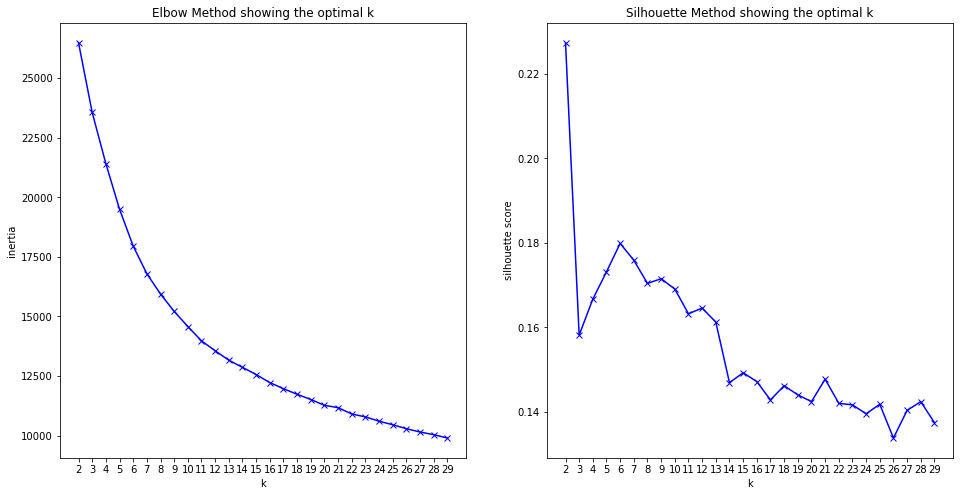

In [28]:
# Choosing the best k
K = range(2, 30)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=12)  
    kmeans.fit(df_scaled)
    
    #filename = "/Users/macbook/Documents/IronHack/Functions_saved/Models/k_means/kmeans_" + str(k) + ".pickle" # Path with filename
    #with open(filename, "wb") as file:
        #pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.predict(df_scaled)))
    print()


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [93]:
kmeans = KMeans(n_clusters=14, random_state=12)
kmeans.fit(df_scaled)

KMeans(n_clusters=14, random_state=12)

In [94]:
clusters1 = kmeans.predict(df_scaled)
pd.Series(clusters1).value_counts().sort_index()

0     211
1     458
2     295
3     420
4     109
5     398
6     343
7     300
8     203
9      51
10    181
11    226
12    224
13    257
dtype: int64

In [95]:
kmeans.inertia_

12867.648136412969

In [96]:
silhouette_score(df_scaled, kmeans.predict(df_scaled))

0.14687919528913057

In [98]:
# Creating a column in my dataframe with the # of the cluster

df_songs["kmean_cluster"] = clusters1
df_songs["kmean_cluster"].unique()

array([ 1,  6,  3,  2,  7, 10,  5, 13,  0, 11,  8,  9,  4, 12],
      dtype=int32)

# Clustering with DBSCAN

In [75]:
# FIRST TRY - We have 9 features --> min points = 18
model = DBSCAN(eps=0.92, min_samples=18)  
yhat = model.fit_predict(X)

In [76]:
clusters2 = np.unique(yhat)
clusters2

array([-1,  0,  1])

In [40]:
# Finding the best epsilon :
d = distance_matrix(X,X)
print(d)

[[ 0.         70.90732916  3.69783221 ... 32.05542069 38.99226027
  15.95431831]
 [70.90732916  0.         73.36428225 ... 38.85856128 32.10627997
  86.8455749 ]
 [ 3.69783221 73.36428225  0.         ... 34.56907093 41.65126178
  13.81117603]
 ...
 [32.05542069 38.85856128 34.56907093 ...  0.          7.31924665
  47.99357908]
 [38.99226027 32.10627997 41.65126178 ...  7.31924665  0.
  54.9052794 ]
 [15.95431831 86.8455749  13.81117603 ... 47.99357908 54.9052794
   0.        ]]


In [41]:
d2 = np.sort(d)[:,1:]
print(d2)

[[  0.32986174   0.45782982   0.52233535 ... 115.66114299 117.07673411
  121.58865564]
 [  0.86699826   0.90775813   1.062164   ... 169.02579333 169.10924864
  169.65897964]
 [  0.33356962   0.40022927   0.42740211 ... 118.0525201  119.48001597
  123.47107871]
 ...
 [  0.39223906   0.41263331   0.50872124 ... 130.26557231 130.39194318
  131.14728805]
 [  0.70286217   0.85956981   0.97470609 ... 137.30827504 137.46231337
  138.30958658]
 [  0.44127901   0.56904763   0.65870807 ... 131.59778756 133.01098341
  137.26214571]]


In [42]:
f = d2[:,3]
print(f)

[0.58321511 1.24058128 0.440208   ... 0.52364411 1.06711981 0.83530772]


In [43]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[20.4365115  15.73565381 14.97631509 ...  0.4518197   0.44931331
  0.440208  ]


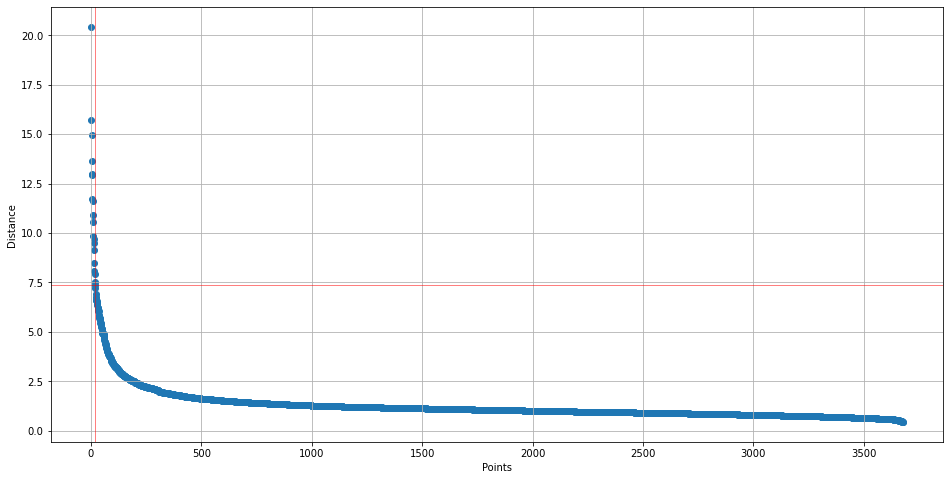

In [44]:
# Plot distances
plt.figure(figsize=(16,8))
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Points")
plt.ylabel("Distance")
# Current selected settings for DBSCAN
xnew = 18
ynew = f_final[18]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

In [45]:
ynew

7.356410405897705

In [128]:
# trying with the right epsilon
model = DBSCAN(eps=2.1, min_samples=18)  
yhat = model.fit_predict(X)

import pickle
filename = "/Users/macbook/Documents/IronHack/Functions_saved/Models/dbscan.pickle" # Path with filename
with open(filename, "wb") as file:
    pickle.dump(model,file)

In [120]:
clusters2 = np.unique(yhat)
clusters2

array([-1,  0,  1,  2,  3])

In [121]:
silhouette_score(X, yhat)

0.16228578255691867

In [125]:
# Creating a column in my dataframe with the # of the cluster

df_songs["db_cluster"] = yhat
df_songs["db_cluster"].unique()

array([ 0,  1, -1,  2,  3])

# Clustering with agglomerative clustering

In [130]:
aglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clusters3 = aglo.fit_predict(df_scaled)
clusters3

array([3222, 2106, 2039, ...,    2,    1,    0])

In [82]:
# plotting the model with dendrogram :
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

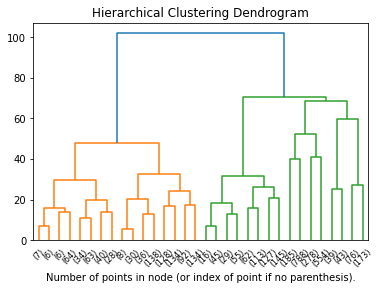

In [122]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(aglo, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [129]:
df_songs.to_csv('final_df_songs.csv')